# Proyek Analisis Data: Bike Sharing
- Nama: Achmad Ramadhan
- Email: achramadhan13@gmail.com
- Id Dicoding: armdhn_3

## Menentukan Pertanyaan Bisnis

- Bagaimana aktivitas pengguna sepeda?
- Apa yang perlu dilakukan untuk pengguna sepeda casual agar menjadi registered?

## Menyaipkan semua library yang dibutuhkan

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
dfhour = pd.read_csv("data/hour.csv", delimiter = ",")


In [3]:
dfhour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
dfhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
dfhour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
dfhour.duplicated().sum()

0

### Cleaning Data

In [7]:
dfhour.rename(columns={'yr': 'year',
                      'mnth' : 'month',
                      'hr' : 'hour',
                      'cnt' : 'count'}, inplace = True)

mengganti nama kolom agar mudah dipahami

In [8]:

dfhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
dfhour['season'] = dfhour['season'].map({1: 'springer',
                                       2: 'summer',
                                       3: 'fall',
                                       4: 'winter'})

mengganti data di kolom season, untuk 1 adalah springer, 2 adalah summer, 3 adalah fall, dan 4 adalah winter

In [10]:
dfhour['holiday'] = dfhour['holiday'].map({0: 'no',
                                           1: 'yes'})

In [11]:
dfhour['workingday'] = dfhour['workingday'].map({0: 'no',
                                           1: 'yes'})

Mengubah nilai pada kolom 'yr' angka 0 menjadi 2011 dan angka 1 menjadi 2012

## Exploratory Data Analysis (EDA)

In [12]:
dfhour.describe()

,instant,year,month,hour,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.500008,3.438776,6.914405,2.005771,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,12.000000,23.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
def kategori_jam(row):
    if 1 <= row <= 11:
        return "pagi"
    elif 12 <= row <= 14:
        return "siang"
    elif 15 <= row <= 18:
        return "sore"
    else:
        return "malam"

dfhour['jam_kategori'] = dfhour['hour'].apply(kategori_jam)

Mengelompokkan jam berdasarkan pagi, siang, sore, dan malam
pagi = jam 1 - 11
siang = jam 12- 14
sore = 15 - 18
malam = 19 - 24

In [14]:
dfhour['jam_kategori'].unique()

array(['malam', 'pagi', 'siang', 'sore'], dtype=object)

In [15]:
grouped = dfhour.groupby('jam_kategori')[['casual', 'registered']].sum()
grouped

,casual,registered
jam_kategori,,
malam,117093,598374
pagi,138248,836450
siang,157520,387465
sore,207156,850373


In [16]:
grouped = dfhour.groupby('weekday')[['casual', 'registered','count']].sum().sort_values(by='weekday',ascending = True)
grouped

,casual,registered,count
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


In [17]:
grouped = dfhour.groupby('year')[['casual','registered','count']].sum().sort_values(by='count')
grouped

,casual,registered,count
year,,,
0,247252,995851,1243103
1,372765,1676811,2049576


## Visualization & Explanatory Analysis

### Pertanyaan 1

<Axes: xlabel='hour', ylabel='count'>

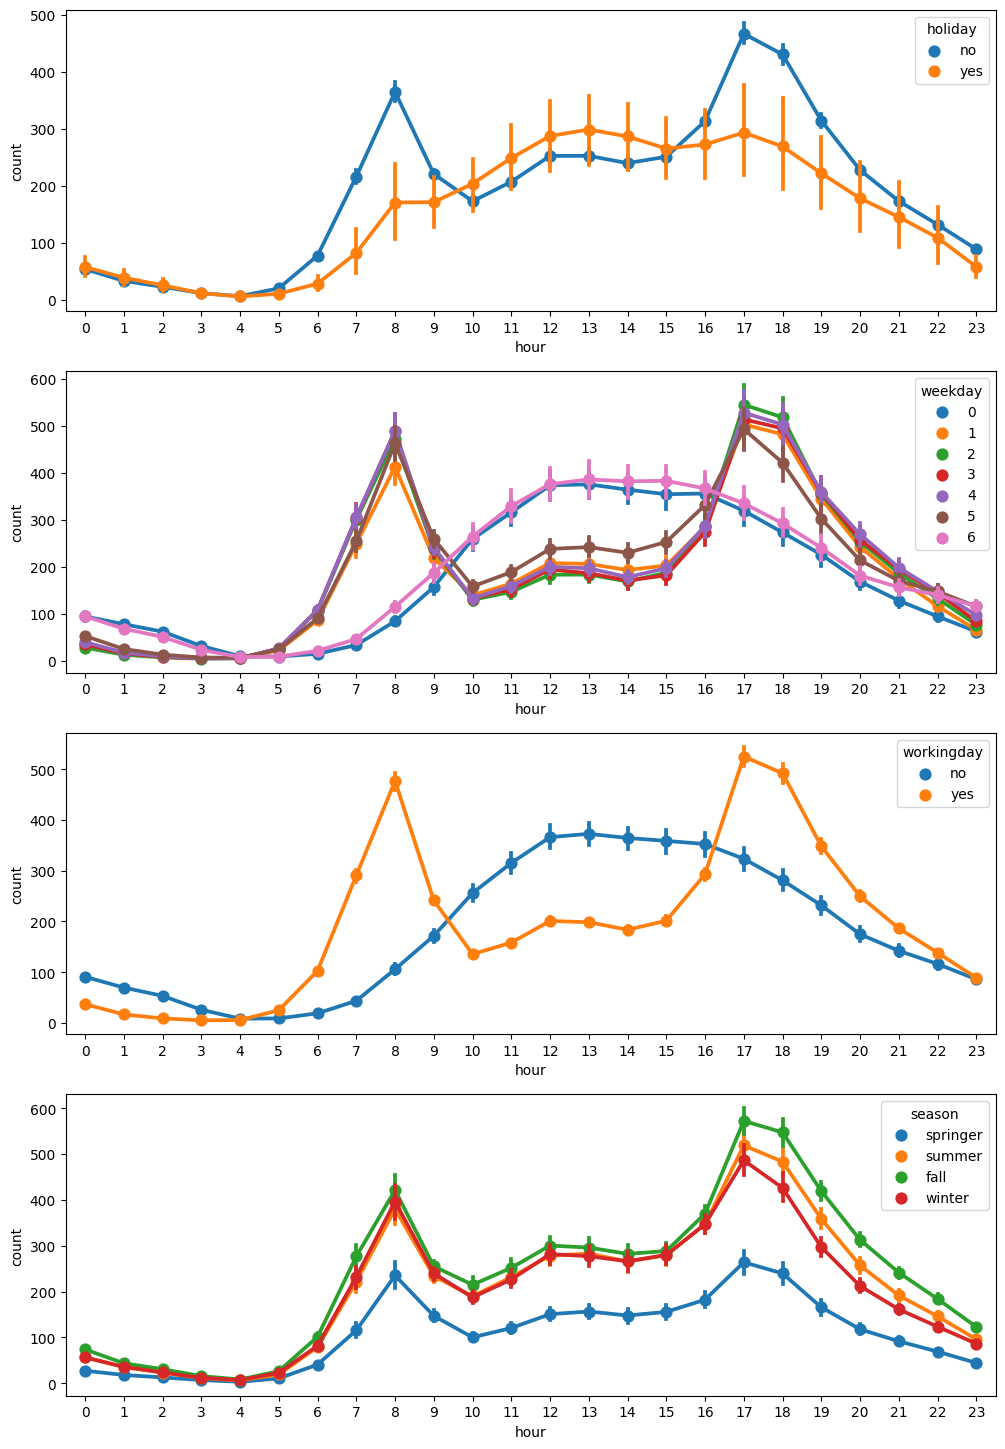

In [18]:
figure, axes = plt. subplots(nrows = 4)
figure.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', data = dfhour, hue = 'holiday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = dfhour, hue = 'weekday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = dfhour, hue = 'workingday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = dfhour, hue = 'season', ax = axes[3])


### Pertanyaan 2

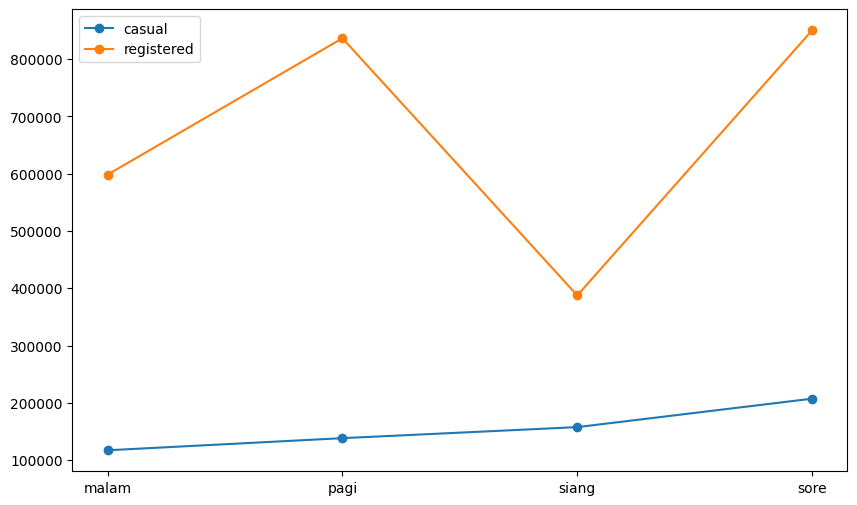

In [19]:


grouped = dfhour.groupby('jam_kategori')[['casual', 'registered']].sum()


plt.figure(figsize=(10, 6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], marker='o', label=column)
    plt.legend()


perilaku pengguna sepeda berdasarkan jam kategori, pengguna registered menggunakan sepeda aktif di pagi dan sore hari. sementara pengguna casual terlihat trend meningkat dari pagi hingga sore hari, sore merupakan aktivitas terbanyak untuk pengguna casual

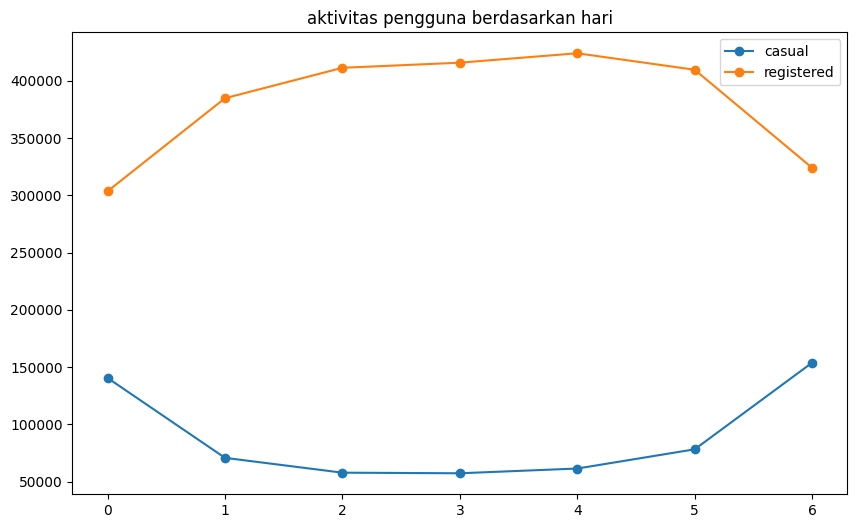

In [20]:


grouped = dfhour.groupby('weekday')[['casual', 'registered']].sum()


plt.figure(figsize=(10, 6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], marker='o', label=column)
    plt.legend()
    plt.title('aktivitas pengguna berdasarkan hari')





x axis menunjukkan hari dimana angka 0 adalah sunday dan angka 6 adalah saturday


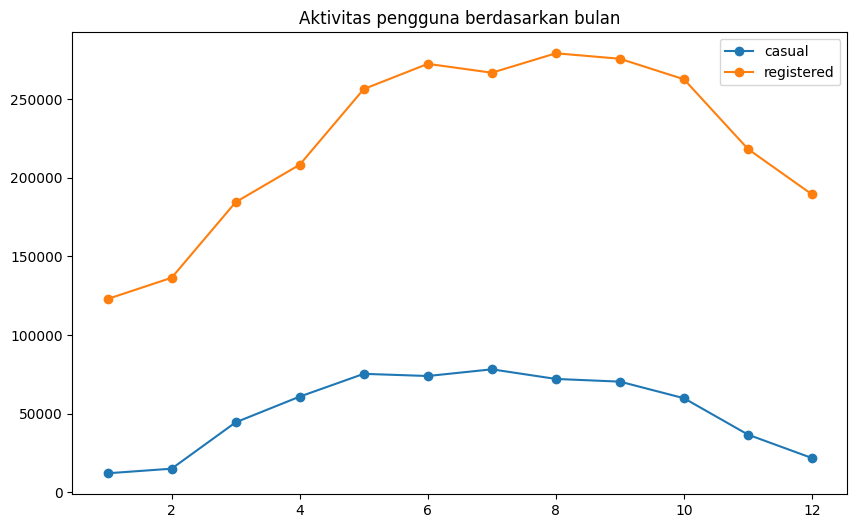

In [21]:


grouped = dfhour.groupby('month')[['casual', 'registered']].sum()


plt.figure(figsize=(10, 6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], marker='o', label=column)
    plt.legend()
    plt.title('Aktivitas pengguna berdasarkan bulan')

## Conclusion

### Conclusion Pertanyaan 1

- Jam 7-8 dan 16-17  merupakan jam tersibuk bagi pengendara sepeda di hari senin sampai jumat, sementara di hari sabtu dan minggu jam tersibuk berada di siang hari


### Conclusion Pertanyaan 2


- berikan promosi atau penjelasan keuntungan menjadi pengendara registered kepada pengguna casual. berikan email atau notifikasi aplikasi pada hari jumat, karena pengguna casual aktif di hari sabtu dan minggu. jadi pengguna casual akan mempertimbangkannya sebelum menggunakan sepeda